## Guided Project of popular Data Science Questions

#### The focus of this guided project is to explore an interest is in Data Science Stack Exchange (DSSE) website:
* Questions on data science pratice, programming languages, tools and machine learning are typically asked and answered.
* DSSE's home page is subdivided into Questions, Tags, Users and Unanswered
* The "Tags", "Unanswered" and "Questions" subdivisions of the home page will be a good candidate for the goal of this project
* Some of the key information connected with each post are: Questions, Answers, Accepted Answers Tick, Votes, Views

In [2]:
# SELECT TOP 10 *
#   FROM tags
#  ORDER BY Count DESC;



In [3]:
# SELECT TOP 10 *
#   FROM posts
#  ORDER BY Count DESC;

In [4]:
# #Top 10 posts by Creation Date
# SELECT TOP 10 *
#   FROM posts
#  ORDER BY CreationDate DESC;

In [5]:
# SELECT Id, CreationDate,
#        Score, ViewCount, Tags,
#        AnswerCount, FavoriteCount
#   FROM posts
#  WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

In [6]:
# We import everything that we'll use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
# obtaining and loading the dataset to be used
questions = pd.read_csv("Datasets/2019_questions.csv", parse_dates=["CreationDate"])

In [8]:
#exploring the dataset to discover missing values and data types of values
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6781 non-null   int64         
 1   CreationDate   6781 non-null   datetime64[ns]
 2   Score          6781 non-null   int64         
 3   ViewCount      6781 non-null   int64         
 4   Tags           6781 non-null   object        
 5   AnswerCount    6781 non-null   int64         
 6   FavoriteCount  1571 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 371.0+ KB


In [9]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    5210
dtype: int64

### checking the data types of each column:


In [10]:
print (questions.dtypes)

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object


Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64

### Cleaning the data

In [11]:
#exploring the top 10 rows of the dataset
questions.head(11)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,47286,2019-03-14 08:43:00,3,250,<python><deep-learning><tensorflow>,0,NaN
1,47287,2019-03-14 08:53:00,2,9430,<python><matplotlib>,2,1.0
2,47289,2019-03-14 09:14:00,2,134,<computer-vision><object-detection><faster-rcnn>,1,NaN
3,47291,2019-03-14 10:08:00,3,177,<visualization><data-analysis><google><google-...,1,NaN
4,47293,2019-03-14 10:49:00,3,844,<keras><convnet>,0,NaN
5,47294,2019-03-14 10:51:00,1,212,<regression><batch-normalization>,0,NaN
6,47295,2019-03-14 11:04:00,2,1620,<machine-learning><neural-network><categorical...,2,NaN
7,47296,2019-03-14 11:15:00,2,400,<python><tensorflow><object-detection>,0,NaN
8,47297,2019-03-14 11:34:00,1,31,<python><bayesian><scipy><probabilistic-progra...,0,NaN
9,47298,2019-03-14 11:35:00,1,31,<time-series><recurrent-neural-net>,1,NaN


In [12]:
#churn.fillna(0, inplace=True)
#filling in the missing values of FavoriteCount with 0 and make its data type an int
questions['FavoriteCount'] = questions['FavoriteCount'].replace(np.nan, 0)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.head(11)


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,47286,2019-03-14 08:43:00,3,250,<python><deep-learning><tensorflow>,0,0
1,47287,2019-03-14 08:53:00,2,9430,<python><matplotlib>,2,1
2,47289,2019-03-14 09:14:00,2,134,<computer-vision><object-detection><faster-rcnn>,1,0
3,47291,2019-03-14 10:08:00,3,177,<visualization><data-analysis><google><google-...,1,0
4,47293,2019-03-14 10:49:00,3,844,<keras><convnet>,0,0
5,47294,2019-03-14 10:51:00,1,212,<regression><batch-normalization>,0,0
6,47295,2019-03-14 11:04:00,2,1620,<machine-learning><neural-network><categorical...,2,0
7,47296,2019-03-14 11:15:00,2,400,<python><tensorflow><object-detection>,0,0
8,47297,2019-03-14 11:34:00,1,31,<python><bayesian><scipy><probabilistic-progra...,0,0
9,47298,2019-03-14 11:35:00,1,31,<time-series><recurrent-neural-net>,1,0


In [13]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")
questions.head(5)                                                  

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,47286,2019-03-14 08:43:00,3,250,"[python, deep-learning, tensorflow]",0,0
1,47287,2019-03-14 08:53:00,2,9430,"[python, matplotlib]",2,1
2,47289,2019-03-14 09:14:00,2,134,"[computer-vision, object-detection, faster-rcnn]",1,0
3,47291,2019-03-14 10:08:00,3,177,"[visualization, data-analysis, google, google-...",1,0
4,47293,2019-03-14 10:49:00,3,844,"[keras, convnet]",0,0


In [14]:
#questions["Tags"].value_counts()

In [15]:
tag_tally = dict()

for all_tags in questions["Tags"]:
    for a_tag in all_tags:
        if a_tag in tag_tally:
            tag_tally[a_tag] += 1
        else:
            tag_tally[a_tag] = 1
tag_tally            

{'python': 1448,
 'deep-learning': 889,
 'tensorflow': 413,
 'matplotlib': 63,
 'computer-vision': 89,
 'object-detection': 69,
 'faster-rcnn': 18,
 'visualization': 106,
 'data-analysis': 49,
 'google': 15,
 'google-cloud': 2,
 'google-data-studio': 2,
 'keras': 706,
 'convnet': 82,
 'regression': 270,
 'batch-normalization': 22,
 'machine-learning': 2130,
 'neural-network': 819,
 'categorical-data': 65,
 'word-embeddings': 96,
 'bayesian': 25,
 'scipy': 33,
 'probabilistic-programming': 6,
 'time-series': 337,
 'recurrent-neural-net': 58,
 'convolution': 74,
 'opencv': 29,
 'image-preprocessing': 46,
 'decision-trees': 119,
 'scikit-learn': 447,
 'mlp': 29,
 'lstm': 290,
 'cnn': 379,
 'project-planning': 6,
 'bigdata': 63,
 'self-study': 8,
 'gan': 63,
 'regularization': 36,
 'nlp': 394,
 'sentiment-analysis': 30,
 'dimensionality-reduction': 59,
 'pytorch': 120,
 'data-mining': 173,
 'activation-function': 37,
 'predictive-modeling': 213,
 'reinforcement-learning': 144,
 'dqn': 25,


In [16]:
tag_tally = pd.DataFrame.from_dict(tag_tally, orient="index")
tag_tally.rename(columns={0: "Count"}, inplace=True)
tag_tally.head(10)

,Count
python,1448
deep-learning,889
tensorflow,413
matplotlib,63
computer-vision,89
object-detection,69
faster-rcnn,18
visualization,106
data-analysis,49
google,15


In [17]:
most_used = tag_tally.sort_values(by="Count").tail(20)
most_used

,Count
data-mining,173
feature-selection,175
r,194
predictive-modeling,213
clustering,229
dataset,250
regression,270
lstm,290
pandas,315
time-series,337


<AxesSubplot:>

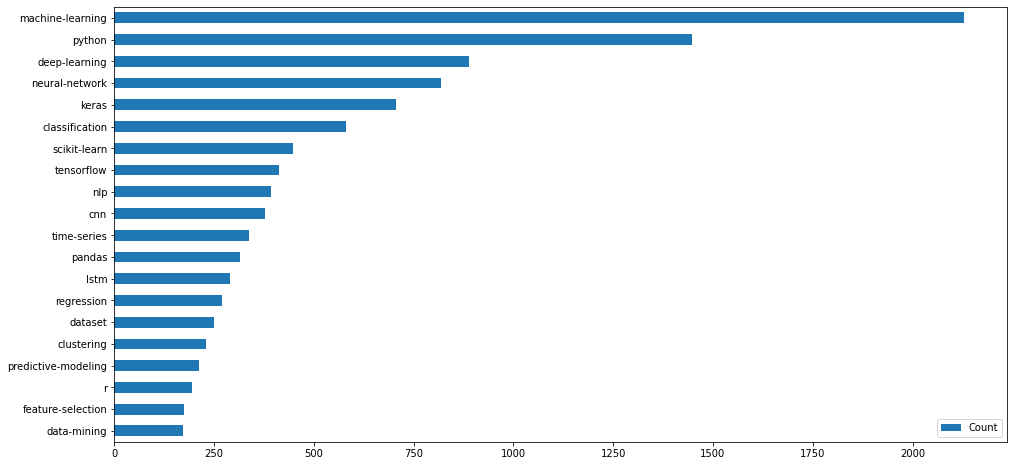

In [18]:
most_used.plot(kind="barh", figsize=(16,8))

<AxesSubplot:>

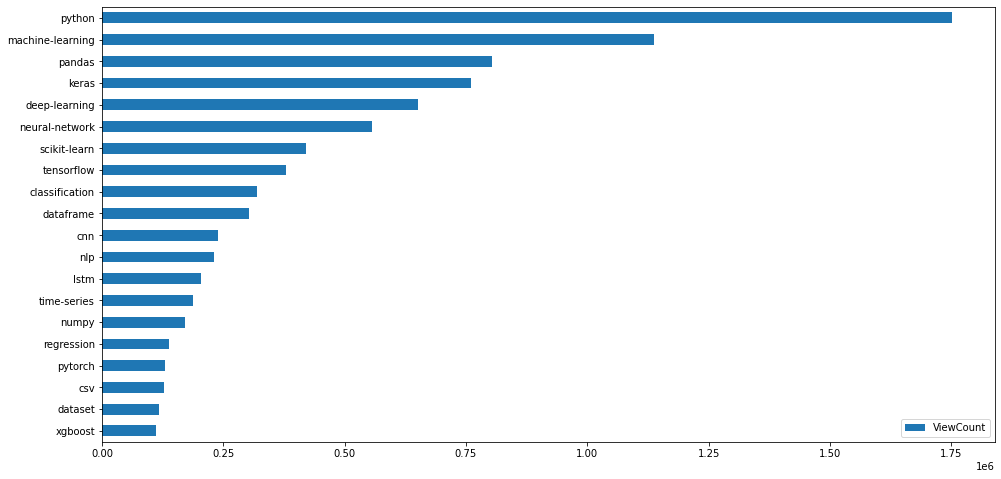

In [19]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

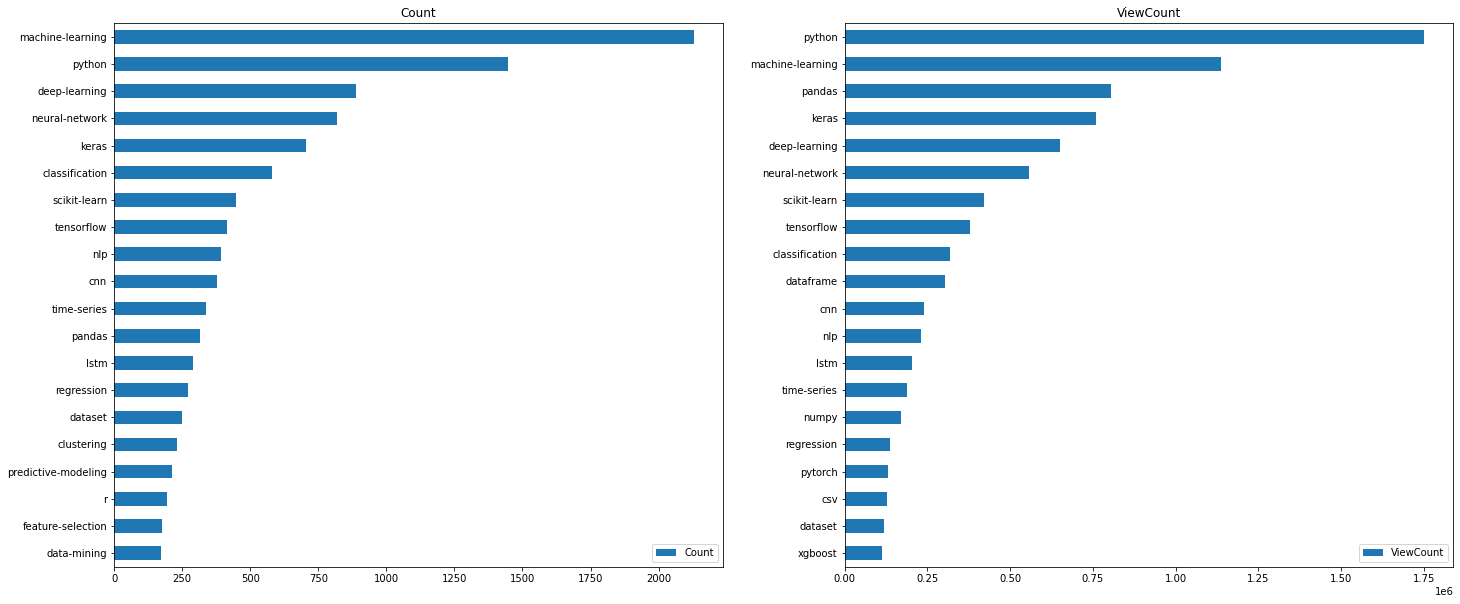

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [21]:
#Looking to see what tags are in most_used, but not in most_viewed
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used


,Count,ViewCount
data-mining,173,NaN
feature-selection,175,NaN
r,194,NaN
predictive-modeling,213,NaN
clustering,229,NaN
dataset,250,117900.0
regression,270,137400.0
lstm,290,203509.0
pandas,315,804293.0
time-series,337,188540.0


In [22]:
#Looking to see what tags are in most_viewed, but not in most_used
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
xgboost,NaN,111347
dataset,250.0,117900
csv,NaN,127365
pytorch,NaN,130785
regression,270.0,137400
numpy,NaN,171352
time-series,337.0,188540
lstm,290.0,203509
nlp,394.0,230933
cnn,379.0,238768


####  The tags present in most_used and not present in most_viewed are:

* machine-learning-model
* statistics
* predictive-modeling
* r


#### And the tags present in most_viewed but not in most_used are:

* csv
* pytorch
* dataframe

Checking for combination of non-related tags e.g pandas and r

In [23]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1240,49148,2019-11-04 19:41:00,1,162,"[r, data-mining, pandas, matlab, databases]",3,0


### Relation between Tags

In [24]:
#creating a list of all tags.
all_tags = list(tag_tally.index)
all_tags

['python',
 'deep-learning',
 'tensorflow',
 'matplotlib',
 'computer-vision',
 'object-detection',
 'faster-rcnn',
 'visualization',
 'data-analysis',
 'google',
 'google-cloud',
 'google-data-studio',
 'keras',
 'convnet',
 'regression',
 'batch-normalization',
 'machine-learning',
 'neural-network',
 'categorical-data',
 'word-embeddings',
 'bayesian',
 'scipy',
 'probabilistic-programming',
 'time-series',
 'recurrent-neural-net',
 'convolution',
 'opencv',
 'image-preprocessing',
 'decision-trees',
 'scikit-learn',
 'mlp',
 'lstm',
 'cnn',
 'project-planning',
 'bigdata',
 'self-study',
 'gan',
 'regularization',
 'nlp',
 'sentiment-analysis',
 'dimensionality-reduction',
 'pytorch',
 'data-mining',
 'activation-function',
 'predictive-modeling',
 'reinforcement-learning',
 'dqn',
 'deepmind',
 'clustering',
 'k-means',
 'unsupervised-learning',
 'weka',
 'metric',
 'machine-learning-model',
 'linear-regression',
 'recommender-system',
 'supervised-learning',
 'data-science-model'

In [25]:
#creating a dataframe where each row will represent a tag, 
# and each column also represnt a tag
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,python,deep-learning,tensorflow,matplotlib
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN
matplotlib,NaN,NaN,NaN,NaN


  filling the created this dataframe with zeroes and then, for each lists of tags in questions["Tags"],
  we will increment the intervening tags by one. The end result will be a dataframe that for each pair 
  of tags, it tells us how many times they were used together.

In [26]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [27]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,data-mining,feature-selection,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,nlp,tensorflow,scikit-learn,classification,keras,neural-network,deep-learning,python,machine-learning
data-mining,173,13,8,23,1,22,3,1,8,6,2,6,0,2,18,1,4,20,22,85
feature-selection,13,175,5,16,3,4,10,1,2,6,1,4,0,19,17,1,7,18,23,81
r,8,5,194,11,16,5,7,3,1,18,1,2,1,1,8,8,6,4,19,48
predictive-modeling,23,16,11,213,0,5,23,7,4,24,5,0,3,11,24,9,8,23,30,100
clustering,1,3,16,0,229,5,1,3,5,19,0,9,0,22,10,0,4,2,41,52
dataset,22,4,5,5,5,250,4,5,9,3,8,10,7,6,21,8,17,21,41,77
regression,3,10,7,23,1,4,270,10,6,19,4,2,6,33,29,25,40,19,51,100
lstm,1,1,3,7,3,5,10,290,6,60,18,16,26,1,13,97,49,71,43,43
pandas,8,2,1,4,5,9,6,6,315,16,1,3,2,31,3,2,1,1,218,56
time-series,6,6,18,24,19,3,19,60,16,337,7,0,7,7,19,34,25,30,77,106


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [28]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


<AxesSubplot:>

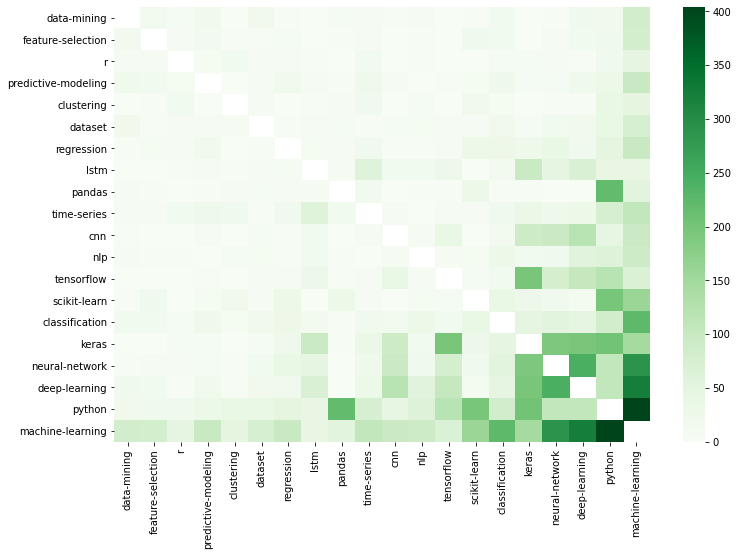

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence) in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

### Enter Domain Knowledge

The top tags for most_used and most_viewed are: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.
All of these can be further classified into two; namely keras,tensorflow and sckit-Learn as libraries in Python.
And the rest:machine-learning, deep-learning, neural-network, classification are all to do with deep-learning.
Domain knowledge in latwest programming tools and development will inform a decision or conclussion to reccommend the popularity to ward a deep learning content

### Just a Fad?

In [30]:
all_questions = pd.read_csv("Datasets/all_questions.csv", parse_dates=["CreationDate"])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50000 non-null  int64         
 1   CreationDate  50000 non-null  datetime64[ns]
 2   Tags          50000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [31]:
all_questions.head()

,Id,CreationDate,Tags
0,32861458,2015-09-30 08:33:00,<testing><flask><upload>
1,32861459,2015-09-30 08:33:00,<c#><.net>
2,32861460,2015-09-30 08:33:00,<jquery><html><dom><tabs>
3,32861461,2015-09-30 08:33:00,<javascript><angularjs><angular-formly>
4,32861464,2015-09-30 08:33:00,<javascript><jquery><html>


In [32]:
all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$", "").str.split("><")
all_questions.head()  

,Id,CreationDate,Tags
0,32861458,2015-09-30 08:33:00,"[testing, flask, upload]"
1,32861459,2015-09-30 08:33:00,"[c#, .net]"
2,32861460,2015-09-30 08:33:00,"[jquery, html, dom, tabs]"
3,32861461,2015-09-30 08:33:00,"[javascript, angularjs, angular-formly]"
4,32861464,2015-09-30 08:33:00,"[javascript, jquery, html]"


Defining deep learning tags as tags that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [33]:
def deep_learning_tags(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [34]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(deep_learning_tags)
all_questions.sample(6)

,Id,CreationDate,Tags,DeepLearning
26378,32875070,2015-09-30 20:30:00,"[python, python-2.7]",0
6708,57736488,2019-08-31 08:46:00,"[python, keras, neural-network, mnist]",1
27436,24608644,2014-07-07 10:38:00,"[ruby-on-rails, ruby, ruby-on-rails-4.1]",0
20102,16483558,2013-10-05 13:34:00,"[c#, tfs, scrum]",0
4127,32806746,2015-09-27 10:03:00,"[javascript, angularjs, xmlhttprequest]",0
23694,8141879,2011-11-15 19:19:00,"[android, iphone, audio, audio-streaming]",0


In [35]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

In [36]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [37]:
all_questions.head(7)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,32861458,2015-09-30 08:33:00,"[testing, flask, upload]",0,15Q3
1,32861459,2015-09-30 08:33:00,"[c#, .net]",0,15Q3
2,32861460,2015-09-30 08:33:00,"[jquery, html, dom, tabs]",0,15Q3
3,32861461,2015-09-30 08:33:00,"[javascript, angularjs, angular-formly]",0,15Q3
4,32861464,2015-09-30 08:33:00,"[javascript, jquery, html]",0,15Q3
5,32861473,2015-09-30 08:33:00,"[git, merge, merge-conflict-resolution]",0,15Q3
6,32861476,2015-09-30 08:33:00,[nexus],0,15Q3


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [38]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(11)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,10Q4,0,7,0.000000
9,11Q1,0,13,0.000000
7,10Q3,0,1,0.000000
19,14Q4,3,894,0.003356
23,15Q4,0,23,0.000000
0,08Q1,0,367,0.000000
21,15Q2,1,1006,0.000994
6,10Q2,0,20,0.000000
16,14Q1,0,2046,0.000000
4,09Q2,0,22,0.000000


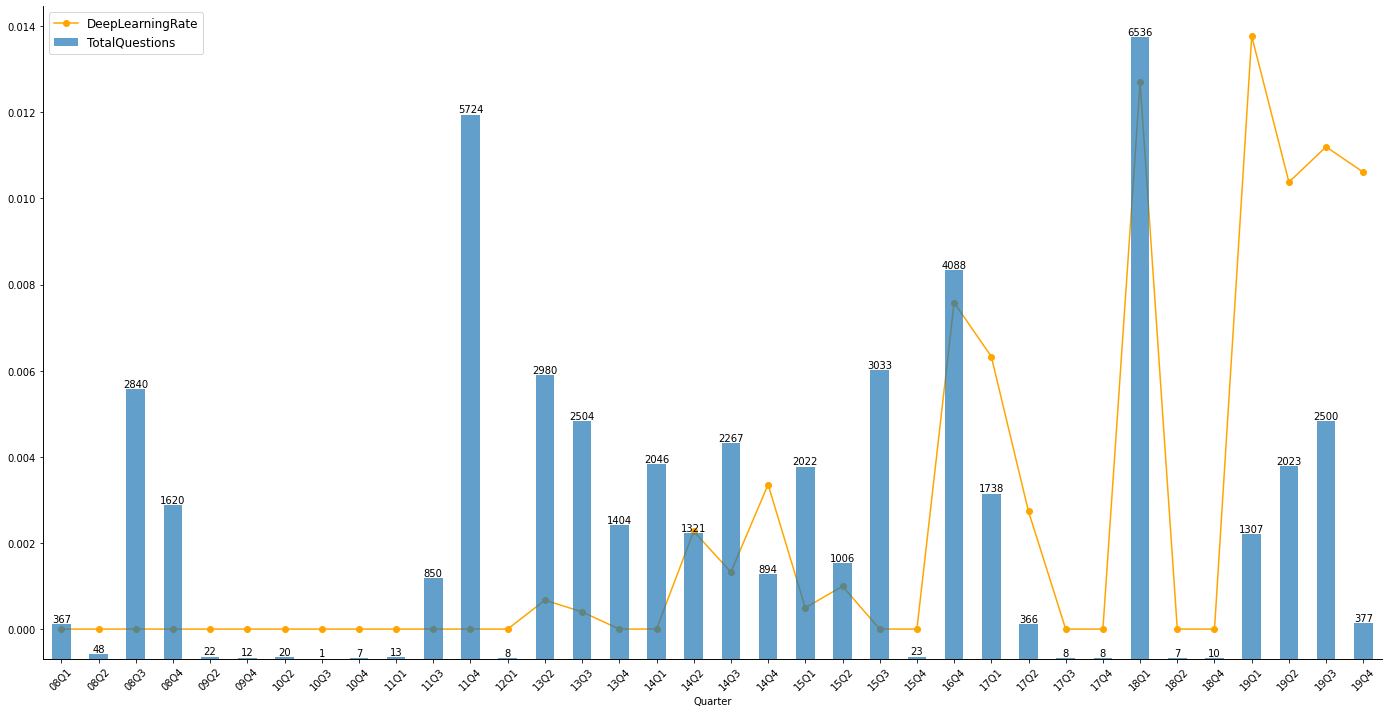

In [39]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.